In [241]:
import pyforest
from sklearn.metrics import mean_squared_error
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix

In [242]:
production = pd.read_csv('Production.csv')

In [243]:
production

,Timestamp,CupState,CurrentWeight,EmergencyStop,FanOn,HeatCoverClosed,HeaterOn,HeatingTimePercent,PotAvailable,Produce,ScaleCupDown,ScaleCupUp,SwitchToPot,TrackSwitchAtCup,TrackSwitchAtPot,TurnScaleCup
0,1516355920018,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
1,1516355920120,1,0.153945,1,0,1,0,0,1,0,0,1,0,1,0,0
2,1516355920229,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
3,1516355920339,1,0.123156,1,0,1,0,0,1,0,0,1,0,1,0,0
4,1516355920450,1,0.123156,1,0,1,0,0,1,0,0,1,0,1,0,0
5,1516355920558,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
6,1516355920667,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
7,1516355920776,1,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,0
8,1516355920886,1,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,0
9,1516355920995,1,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,0


In [244]:
production.info

<bound method DataFrame.info of           Timestamp  CupState  CurrentWeight  EmergencyStop  FanOn  \
0     1516355920018         1       0.092367              1      0   
1     1516355920120         1       0.153945              1      0   
2     1516355920229         1       0.092367              1      0   
3     1516355920339         1       0.123156              1      0   
4     1516355920450         1       0.123156              1      0   
5     1516355920558         1       0.092367              1      0   
6     1516355920667         1       0.092367              1      0   
7     1516355920776         1       0.000000              1      0   
8     1516355920886         1       0.000000              1      0   
9     1516355920995         1       0.000000              1      0   
10    1516355921105         1       0.123156              1      0   
11    1516355921214         1       0.061578              1      0   
12    1516355921323         1       0.092367              

In [245]:
production.shape

(7728, 16)

In [246]:
production.isnull()

,Timestamp,CupState,CurrentWeight,EmergencyStop,FanOn,HeatCoverClosed,HeaterOn,HeatingTimePercent,PotAvailable,Produce,ScaleCupDown,ScaleCupUp,SwitchToPot,TrackSwitchAtCup,TrackSwitchAtPot,TurnScaleCup
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [247]:
production.isnull().any()

Timestamp             False
CupState              False
CurrentWeight         False
EmergencyStop         False
FanOn                 False
HeatCoverClosed       False
HeaterOn              False
HeatingTimePercent    False
PotAvailable          False
Produce               False
ScaleCupDown          False
ScaleCupUp            False
SwitchToPot           False
TrackSwitchAtCup      False
TrackSwitchAtPot      False
TurnScaleCup          False
dtype: bool

In [248]:
production.dropna

<bound method DataFrame.dropna of           Timestamp  CupState  CurrentWeight  EmergencyStop  FanOn  \
0     1516355920018         1       0.092367              1      0   
1     1516355920120         1       0.153945              1      0   
2     1516355920229         1       0.092367              1      0   
3     1516355920339         1       0.123156              1      0   
4     1516355920450         1       0.123156              1      0   
5     1516355920558         1       0.092367              1      0   
6     1516355920667         1       0.092367              1      0   
7     1516355920776         1       0.000000              1      0   
8     1516355920886         1       0.000000              1      0   
9     1516355920995         1       0.000000              1      0   
10    1516355921105         1       0.123156              1      0   
11    1516355921214         1       0.061578              1      0   
12    1516355921323         1       0.092367            

In [249]:
production.head(10)

,Timestamp,CupState,CurrentWeight,EmergencyStop,FanOn,HeatCoverClosed,HeaterOn,HeatingTimePercent,PotAvailable,Produce,ScaleCupDown,ScaleCupUp,SwitchToPot,TrackSwitchAtCup,TrackSwitchAtPot,TurnScaleCup
0,1516355920018,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
1,1516355920120,1,0.153945,1,0,1,0,0,1,0,0,1,0,1,0,0
2,1516355920229,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
3,1516355920339,1,0.123156,1,0,1,0,0,1,0,0,1,0,1,0,0
4,1516355920450,1,0.123156,1,0,1,0,0,1,0,0,1,0,1,0,0
5,1516355920558,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
6,1516355920667,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
7,1516355920776,1,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,0
8,1516355920886,1,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,0
9,1516355920995,1,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,0


In [250]:
#production.drop(['PotAvailable','ScaleCupDown','ScaleCupUp','HeatingTimePercent','Produce','TurnScaleCup','SwitchToPot', 'CupState', 'TrackSwitchAtCup','TrackSwitchAtPot'], axis =1, inplace=True)

In [251]:
production.head(5)

,Timestamp,CupState,CurrentWeight,EmergencyStop,FanOn,HeatCoverClosed,HeaterOn,HeatingTimePercent,PotAvailable,Produce,ScaleCupDown,ScaleCupUp,SwitchToPot,TrackSwitchAtCup,TrackSwitchAtPot,TurnScaleCup
0,1516355920018,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
1,1516355920120,1,0.153945,1,0,1,0,0,1,0,0,1,0,1,0,0
2,1516355920229,1,0.092367,1,0,1,0,0,1,0,0,1,0,1,0,0
3,1516355920339,1,0.123156,1,0,1,0,0,1,0,0,1,0,1,0,0
4,1516355920450,1,0.123156,1,0,1,0,0,1,0,0,1,0,1,0,0


In [252]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 16 columns):
Timestamp             7728 non-null int64
CupState              7728 non-null int64
CurrentWeight         7728 non-null float64
EmergencyStop         7728 non-null int64
FanOn                 7728 non-null int64
HeatCoverClosed       7728 non-null int64
HeaterOn              7728 non-null int64
HeatingTimePercent    7728 non-null int64
PotAvailable          7728 non-null int64
Produce               7728 non-null int64
ScaleCupDown          7728 non-null int64
ScaleCupUp            7728 non-null int64
SwitchToPot           7728 non-null int64
TrackSwitchAtCup      7728 non-null int64
TrackSwitchAtPot      7728 non-null int64
TurnScaleCup          7728 non-null int64
dtypes: float64(1), int64(15)
memory usage: 966.1 KB


In [327]:
production.drop(['EmergencyStop','PotAvailable'], axis = 1, inplace=True)

In [329]:
production.head(10)

,Timestamp,CupState,CurrentWeight,FanOn,HeatCoverClosed,HeaterOn,HeatingTimePercent,Produce,ScaleCupDown,ScaleCupUp,SwitchToPot,TrackSwitchAtCup,TrackSwitchAtPot,TurnScaleCup
0,1516355920018,1,0.092367,0,1,0,0,0,0,1,0,1,0,0
1,1516355920120,1,0.153945,0,1,0,0,0,0,1,0,1,0,0
2,1516355920229,1,0.092367,0,1,0,0,0,0,1,0,1,0,0
3,1516355920339,1,0.123156,0,1,0,0,0,0,1,0,1,0,0
4,1516355920450,1,0.123156,0,1,0,0,0,0,1,0,1,0,0
5,1516355920558,1,0.092367,0,1,0,0,0,0,1,0,1,0,0
6,1516355920667,1,0.092367,0,1,0,0,0,0,1,0,1,0,0
7,1516355920776,1,0.000000,0,1,0,0,0,0,1,0,1,0,0
8,1516355920886,1,0.000000,0,1,0,0,0,0,1,0,1,0,0
9,1516355920995,1,0.000000,0,1,0,0,0,0,1,0,1,0,0


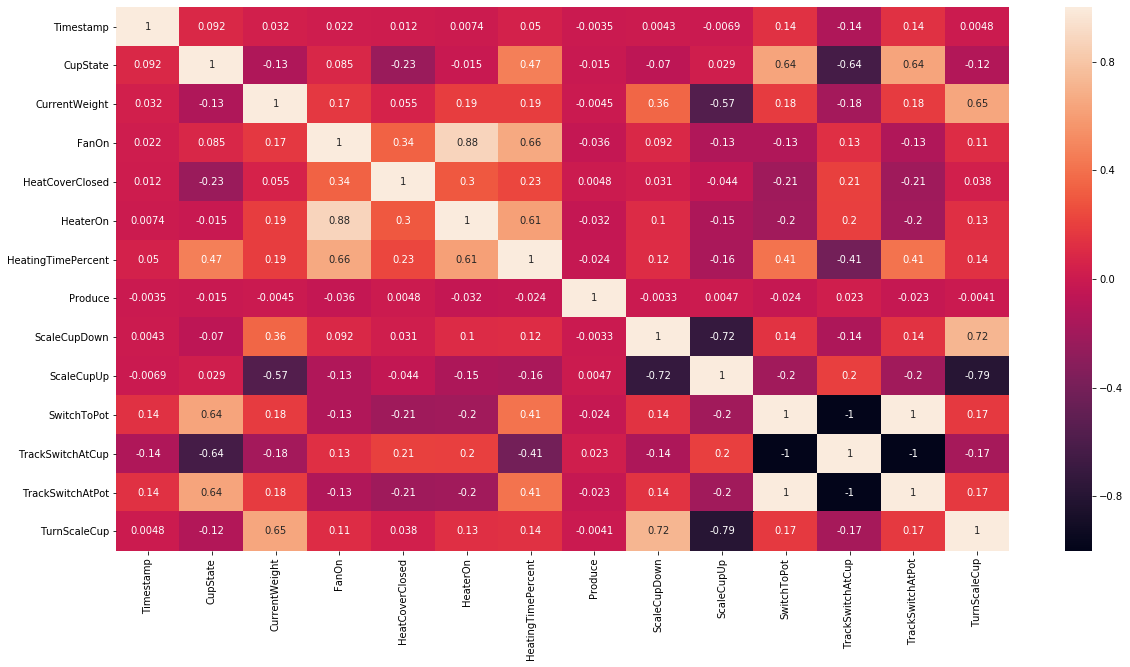

In [330]:
plt.figure(figsize=(20,10))
sns.heatmap(production.corr(),annot=True)

In [351]:
features = production[['TurnScaleCup','ScaleCupDown','SwitchToPot' ,'HeaterOn','ScaleCupUp']]
label = production[['CurrentWeight']]

In [352]:
label

,CurrentWeight
0,0.092367
1,0.153945
2,0.092367
3,0.123156
4,0.123156
5,0.092367
6,0.092367
7,0.000000
8,0.000000
9,0.000000


In [353]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 14 columns):
Timestamp             7728 non-null int64
CupState              7728 non-null int64
CurrentWeight         7728 non-null float64
FanOn                 7728 non-null int64
HeatCoverClosed       7728 non-null int64
HeaterOn              7728 non-null int64
HeatingTimePercent    7728 non-null int64
Produce               7728 non-null int64
ScaleCupDown          7728 non-null int64
ScaleCupUp            7728 non-null int64
SwitchToPot           7728 non-null int64
TrackSwitchAtCup      7728 non-null int64
TrackSwitchAtPot      7728 non-null int64
TurnScaleCup          7728 non-null int64
dtypes: float64(1), int64(13)
memory usage: 845.3 KB


In [354]:
model = LinearRegression()

In [355]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [356]:
print(features_train.shape)

(6955, 5)


In [357]:
print(label_train.shape)

(6955, 1)


In [358]:
print(label_test.shape)

(773, 1)


In [359]:
print(features_test.shape)

(773, 5)


In [360]:
label_train.values.ravel().shape


(6955,)

In [361]:
logreg = LinearRegression()
model = logreg.fit(features_train,label_train.values.ravel())

In [362]:
model.fit(features_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [363]:
prediction = model.predict(features_test)

In [364]:
prediction[2]

array([0.89449287])

In [365]:
features_test.head(10)

,TurnScaleCup,ScaleCupDown,SwitchToPot,HeaterOn,ScaleCupUp
425,0,0,0,1,1
2205,0,0,0,1,1
4103,0,0,0,1,1
4883,0,0,1,0,1
7029,0,0,0,1,1
218,0,0,0,1,1
1650,0,0,1,1,1
106,0,0,0,0,1
7653,0,0,0,0,1
4264,0,0,0,1,1


In [366]:
label_test.loc[2205]

CurrentWeight    0.58499
Name: 2205, dtype: float64

In [367]:
from sklearn.metrics import r2_score #R squared value
r2_score(label_test, prediction)

0.4984877944737275

In [368]:
from sklearn.metrics import mean_squared_error
y_true = label_test
y_pred = prediction
mean_squared_error(label_test, prediction)

2.463920178205021

In [369]:
mean_squared_error(y_true, y_pred, multioutput='raw_values')


array([2.46392018])

In [370]:
np.sqrt(mean_squared_error(label_test, prediction))

1.5696879238259498